# Handwritten digit classification using Neural Network

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


In [2]:
from sklearn.datasets import load_digits
x=load_digits()
x

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
df=pd.DataFrame(data=x.data,columns=x.feature_names)
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [4]:
df['target']=x.target
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [6]:
df['target'].unique() # 10 classes are there

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
df.iloc[0].shape

(65,)

In [8]:
type(df.iloc[0])

pandas.core.series.Series

In [9]:
type(df.iloc[[0]])

pandas.core.frame.DataFrame

In [10]:
X=df.drop('target',axis=1)
X=X.to_numpy()
X.shape  # converting the whole Dataframe into numpy array using to_numpy()

(1797, 64)

In [11]:
type(df.iloc[0,:])

pandas.core.series.Series

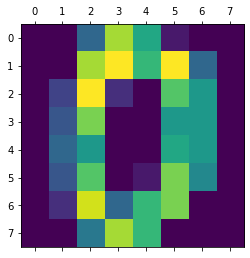

In [12]:
plt.matshow(X[0].reshape(8,8))
# matshow() need 2 D Array and an array can be reshaped not a series or DataFrame

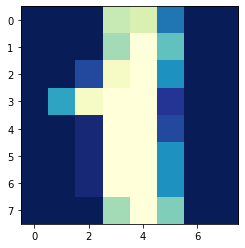

In [13]:
plt.imshow(X[1].reshape(8,8),cmap='YlGnBu_r')

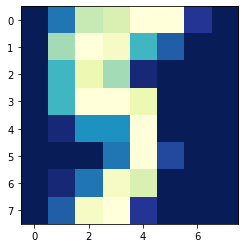

In [14]:
plt.imshow(X[15].reshape(8,8),cmap='YlGnBu_r')

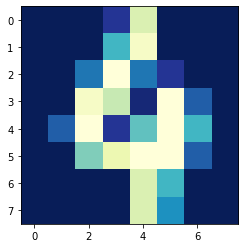

In [15]:
plt.imshow(X[100].reshape(8,8),cmap='YlGnBu_r')

In [16]:
# BEfore applying anything we have to train_test_split the data

In [17]:
from sklearn.model_selection import train_test_split


In [18]:
X=df.drop('target',axis=1).to_numpy()
X.dtype
type(X)

numpy.ndarray

In [19]:
y=df['target']
y.dtype

dtype('int32')

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [21]:
X_train[0].shape

(64,)

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_train.shape
X_test=scaler.transform(X_test)
X_test.shape

(540, 64)

In [23]:
new_train=[]
new_test=[]
for i in range(len(X_train)):
    new_train.append(X_train[i].reshape(8,8))
    
for i in range(len(X_test)):
    new_test.append(X_test[i].reshape(8,8))

In [24]:
X_train=np.array(new_train)
X_test=np.array(new_test)


In [25]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dropout

In [26]:
model=Sequential()


In [27]:
#adding convolution layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(8,8,1)))
#adding pooling layer
model.add(MaxPool2D(2,2))
#adding fully connected layer
model.add(Flatten())
model.add(Dense(100,activation='relu'))
#adding output layer
model.add(Dense(10,activation='softmax'))
#compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [28]:
#fitting the model
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
40/40 [==============================] - 2s 7ms/step - loss: 2.0644 - accuracy: 0.4940
Epoch 2/100
40/40 [==============================] - 0s 7ms/step - loss: 1.2828 - accuracy: 0.8210
Epoch 3/100
40/40 [==============================] - 0s 7ms/step - loss: 0.5679 - accuracy: 0.9109
Epoch 4/100
40/40 [==============================] - 0s 7ms/step - loss: 0.3216 - accuracy: 0.9316
Epoch 5/100
40/40 [==============================] - 0s 8ms/step - loss: 0.2409 - accuracy: 0.9387
Epoch 6/100
40/40 [==============================] - 0s 7ms/step - loss: 0.1897 - accuracy: 0.9586
Epoch 7/100
40/40 [==============================] - 0s 7ms/step - loss: 0.1568 - accuracy: 0.9642
Epoch 8/100
40/40 [==============================] - 0s 7ms/step - loss: 0.1356 - accuracy: 0.9682
Epoch 9/100
40/40 [==============================] - 0s 7ms/step - loss: 0.1177 - accuracy: 0.9714
Epoch 10/100
40/40 [==============================] - 0s 7ms/step - loss: 0.1031 - accuracy: 0.9801
Epoch 11/

40/40 [==============================] - 0s 7ms/step - loss: 9.7902e-04 - accuracy: 1.0000
Epoch 84/100
40/40 [==============================] - 0s 7ms/step - loss: 9.7719e-04 - accuracy: 1.0000
Epoch 85/100
40/40 [==============================] - 0s 7ms/step - loss: 9.6729e-04 - accuracy: 1.0000
Epoch 86/100
40/40 [==============================] - 0s 7ms/step - loss: 9.0047e-04 - accuracy: 1.0000
Epoch 87/100
40/40 [==============================] - 0s 7ms/step - loss: 8.5857e-04 - accuracy: 1.0000
Epoch 88/100
40/40 [==============================] - 0s 7ms/step - loss: 8.5301e-04 - accuracy: 1.0000
Epoch 89/100
40/40 [==============================] - 0s 7ms/step - loss: 8.2776e-04 - accuracy: 1.0000
Epoch 90/100
40/40 [==============================] - 0s 8ms/step - loss: 7.7324e-04 - accuracy: 1.0000
Epoch 91/100
40/40 [==============================] - 0s 7ms/step - loss: 7.9061e-04 - accuracy: 1.0000
Epoch 92/100
40/40 [==============================] - 0s 7ms/step - loss: 7.3

In [29]:
model.evaluate(X_test,y_test)

17/17 [==============================] - 1s 5ms/step - loss: 0.0518 - accuracy: 0.9815


[0.05176081135869026, 0.9814814925193787]

In [30]:

model.save('mnist.h5')
print("Saving the model as mnist.h5")

Saving the model as mnist.h5
